In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn import  metrics
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

In [6]:
#loading dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data , columns=data.feature_names)
df['target']=data.target

In [8]:
#splitting the data
train , test = train_test_split(df , test_size=0.2 , random_state=42)

In [9]:
#Save the training and testing sets to CSV files

train.to_csv('train.csv' , index=False)
test.to_csv('test.csv' , index=False)

In [15]:
#loading the dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

predictors = [x for x in train.columns if x != 'target']
target = 'target'

In [17]:
predictors

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [12]:
target

'target'

In [27]:
#creating a Function

def modelfit(alg , dtrain , dtest , predictors , performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])

    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    # Predict test set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]

    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (cv_score.mean(), cv_score.std(), cv_score.min(), cv_score.max()))


    # Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest[target], dtest_predprob))
    

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

CV Score : Mean - 0.9887783 | Std - 0.006475939 | Min - 0.9772962 | Max - 0.99742

Model Report
Accuracy : 1
AUC Score (Train): 1.000000
AUC Score (Test): 0.995087


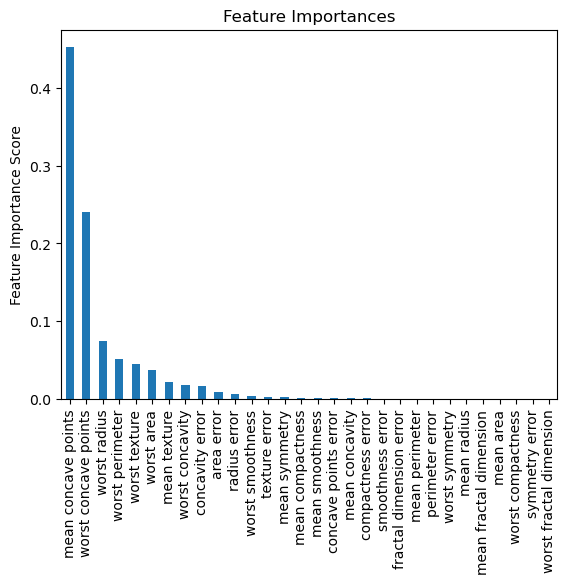

In [28]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train,test, predictors)

In [44]:
#hpyerparameter tuning on n_estimators
param_test1 = {'n_estimators':range(20,100,5)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                                               min_samples_leaf=50,max_depth=8,
                                                               max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 100, 5)},
             scoring='roc_auc')

In [45]:
gsearch1.cv_results_ , gsearch1.best_params_ , gsearch1.best_score_

({'mean_fit_time': array([0.06452188, 0.06718025, 0.07677679, 0.09037309, 0.07917728,
         0.0903738 , 0.12076406, 0.11436625, 0.12494912, 0.14915175,
         0.13661547, 0.14468327, 0.1697845 , 0.21016049, 0.179179  ,
         0.21246467]),
  'std_fit_time': array([0.00723143, 0.00587603, 0.00959732, 0.00897731, 0.0029922 ,
         0.00407734, 0.00992429, 0.00697254, 0.00861577, 0.00927104,
         0.00389955, 0.00735181, 0.0224137 , 0.0373912 , 0.01517041,
         0.02340193]),
  'mean_score_time': array([0.01085443, 0.01599565, 0.01439548, 0.00879765, 0.00879712,
         0.0095974 , 0.00879736, 0.0079987 , 0.00821428, 0.00847301,
         0.00926595, 0.0068541 , 0.01012025, 0.00966802, 0.01328926,
         0.00583053]),
  'std_score_time': array([2.69668106e-03, 8.38681664e-03, 8.97819704e-03, 1.59859661e-03,
         1.59909745e-03, 1.95906051e-03, 1.59921654e-03, 3.98950589e-07,
         4.33779143e-04, 3.47124011e-03, 9.92924764e-04, 3.93496189e-03,
         8.22718367e-

In [33]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, 
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.21371222, 0.11606407, 0.11164227, 0.12339358, 0.12694764,
         0.18932042, 0.12486987, 0.17506399, 0.11573281, 0.11479034,
         0.18530116, 0.11601605, 0.11240745, 0.11284633, 0.11891384,
         0.16802773, 0.10961246, 0.10878811, 0.11283488, 0.10681171,
         0.16804724, 0.11853075, 0.11528034, 0.1145268 , 0.11202202,
         0.16726623, 0.11692367, 0.10878944, 0.11120229, 0.10430994]),
  'std_fit_time': array([0.02125219, 0.00727674, 0.00580614, 0.00694787, 0.00493611,
         0.00986879, 0.00422671, 0.018829  , 0.00769991, 0.00708593,
         0.00815563, 0.00714974, 0.00321476, 0.0086335 , 0.00755662,
         0.00780994, 0.00351646, 0.00403135, 0.00422737, 0.00805978,
         0.00905691, 0.01274818, 0.00465927, 0.00448576, 0.00618169,
         0.00426934, 0.0080633 , 0.00708313, 0.00642265, 0.01195433]),
  'mean_score_time': array([0.0124855 , 0.00846529, 0.01208177, 0.01129222, 0.00966692,
         0.0100739 , 0.01410403, 0.01409607, 0.

In [35]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(train[predictors],train[target])

gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.19429464, 0.18135548, 0.15313134, 0.1603632 , 0.15189476,
         0.16516347, 0.18537331, 0.15762601, 0.14228001, 0.14718599,
         0.15996499, 0.17570581, 0.17774601, 0.16729798, 0.16287355,
         0.15270314, 0.15268269, 0.14876232, 0.15832429, 0.16040421,
         0.16526775, 0.15072393, 0.14709258, 0.16033506, 0.18327975,
         0.15164914, 0.15358319, 0.14352899, 0.17378817, 0.1366209 ]),
  'std_fit_time': array([0.02510719, 0.03188592, 0.00754624, 0.00644686, 0.00645234,
         0.02747348, 0.0244111 , 0.0053664 , 0.0073    , 0.00904469,
         0.02197426, 0.01724964, 0.01047202, 0.01364352, 0.02287485,
         0.00713864, 0.00921683, 0.00940923, 0.00679191, 0.01115962,
         0.01282042, 0.01367043, 0.01366923, 0.01457367, 0.02147491,
         0.02720284, 0.01444547, 0.00637771, 0.02787523, 0.02876823]),
  'mean_score_time': array([0.00847135, 0.01168928, 0.01208758, 0.01249714, 0.01006732,
         0.02579222, 0.00850596, 0.01651959, 0.

In [36]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                                                               min_samples_split=1200, min_samples_leaf=60, 
                                                               subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.16068945, 0.16816602, 0.1164721 , 0.11687136, 0.11444035,
         0.1112359 , 0.10112424]),
  'std_fit_time': array([0.02968877, 0.04046212, 0.00795081, 0.00495151, 0.00449294,
         0.00081699, 0.00909208]),
  'mean_score_time': array([0.00987329, 0.0117043 , 0.00806003, 0.01007047, 0.01048851,
         0.00807128, 0.00926304]),
  'std_score_time': array([1.30482247e-03, 4.30233834e-03, 3.11838171e-03, 1.26020402e-05,
         8.03699305e-04, 3.12444208e-03, 9.83856145e-04]),
  'param_max_features': masked_array(data=[7, 9, 11, 13, 15, 17, 19],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_features': 13},
   {'max_features': 15},
   {'max_features': 17},
   {'max_features': 19}],
  'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'split1_test_score': array([0.5, 0.5, 

In [37]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                               min_samples_split=1200, min_samples_leaf=60,
                                                               subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.15793734, 0.18123121, 0.14753728, 0.1164609 , 0.12048955,
         0.1164248 ]),
  'std_fit_time': array([0.03455171, 0.03131691, 0.02607952, 0.00465525, 0.00857761,
         0.0222396 ]),
  'mean_score_time': array([0.00957556, 0.01410265, 0.00967517, 0.00685554, 0.01047287,
         0.01007485]),
  'std_score_time': array([8.70516522e-03, 8.05655347e-03, 8.17531705e-04, 3.94207752e-03,
         8.10491728e-04, 2.35757280e-05]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'split3_

CV Score : Mean - 0.9906076 | Std - 0.01075048 | Min - 0.9700722 | Max - 0.9994775

Model Report
Accuracy : 0.989
AUC Score (Train): 0.998552
AUC Score (Test): 0.996397


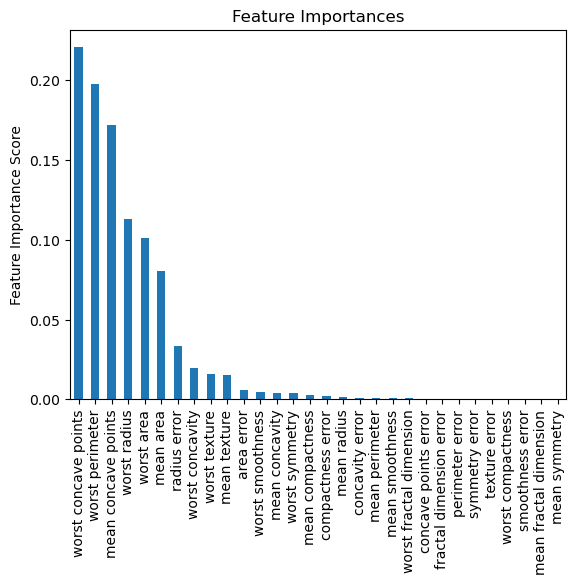

In [46]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=5, min_samples_split=200,
                                         min_samples_leaf=60, subsample=0.85, max_features=7)
modelfit(gbm_tuned_1, train,test, predictors)

CV Score : Mean - 0.9907121 | Std - 0.01054451 | Min - 0.9705882 | Max - 1

Model Report
Accuracy : 0.989
AUC Score (Train): 0.998366
AUC Score (Test): 0.994432


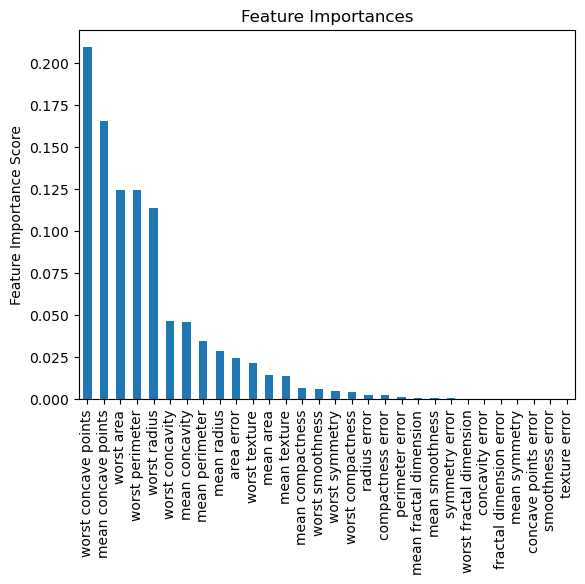

In [41]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=5, min_samples_split=200,
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_2, train,test, predictors)


Model Report
Accuracy : 0.989
AUC Score (Train): 0.998262
AUC Score (Test): 0.995087


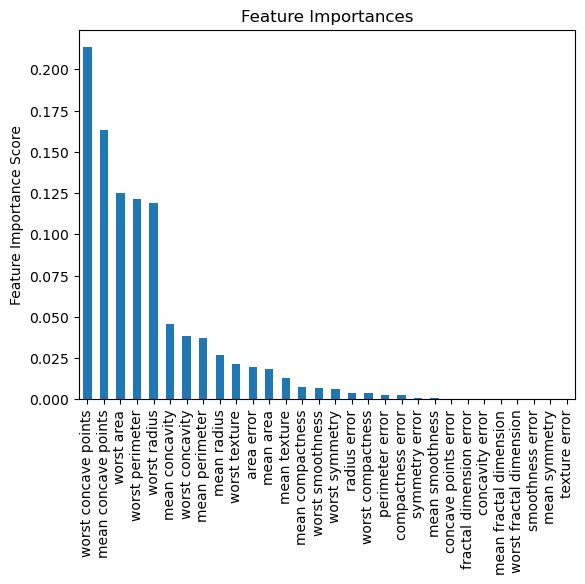

In [42]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=5, min_samples_split=200,
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_3, train,test, predictors, performCV=False)


Model Report
Accuracy : 0.9912
AUC Score (Train): 0.999566
AUC Score (Test): 0.994759


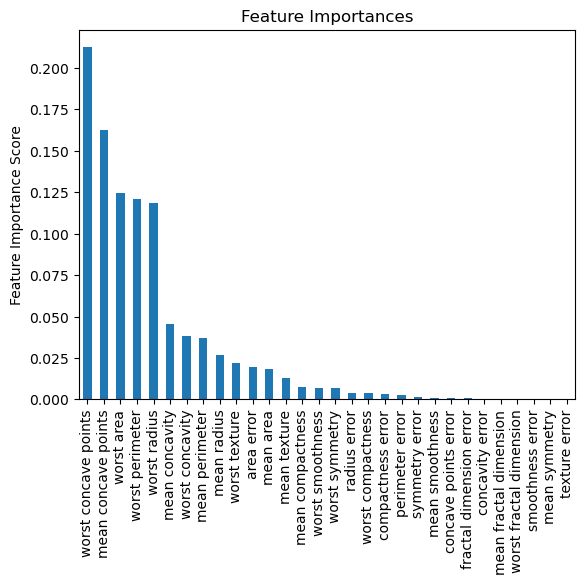

In [43]:
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=5, 
                                         min_samples_split=200, min_samples_leaf=60, subsample=0.85,
                                         random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_4, train, test , predictors, performCV=False)